<a href="https://colab.research.google.com/github/agneya23/Neural-Style-Transfer/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/AI_ML/Projects/Neural_Style_Transfer/')

In [3]:
from Utils import *
from Train import *
from Model import *
from Main import *
import torch
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

GPU


In [4]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True

In [5]:
# Load Images
dtype = torch.cuda.FloatTensor
style = image_loader("/content/drive/MyDrive/AI_ML/Projects/Neural_Style_Transfer/Pictures/Style/starry_night_full.jpg").type(dtype)
content = image_loader("/content/drive/MyDrive/AI_ML/Projects/Neural_Style_Transfer/Pictures/Content/Geroldsee.jpg").type(dtype)
# Initializing the generated Pastiche Image as the Content Image
pastiche = image_loader("/content/drive/MyDrive/AI_ML/Projects/Neural_Style_Transfer/Pictures/Pastiche/Geroldsee.jpg").type(dtype)

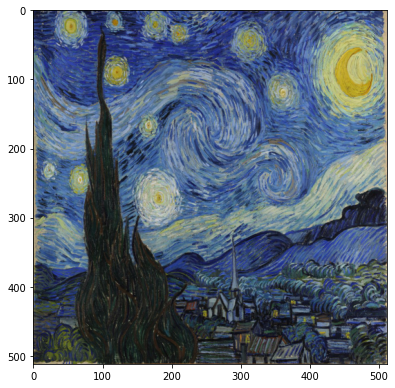

In [6]:
# Display Style Image
style_display = style.cpu()
style_display = style_display.squeeze(0)
plt.imshow(style_display.permute(1,2,0))

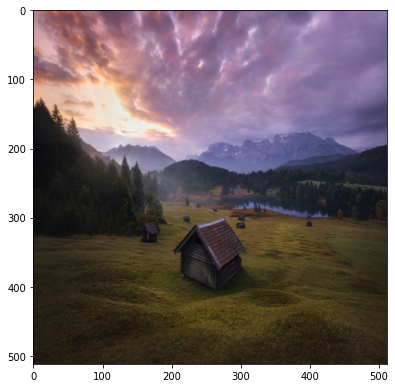

In [7]:
# Display Content Image
content_display = content.cpu()
content_display = content_display.squeeze(0)
plt.imshow(content_display.permute(1,2,0))

In [8]:
# Run the model
output = main(style, content, pastiche, device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Total Loss: 1157.9434814453125
Total Loss: 115.94609069824219
Total Loss: 50.375457763671875
Total Loss: 35.04142761230469
Total Loss: 28.249181747436523


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


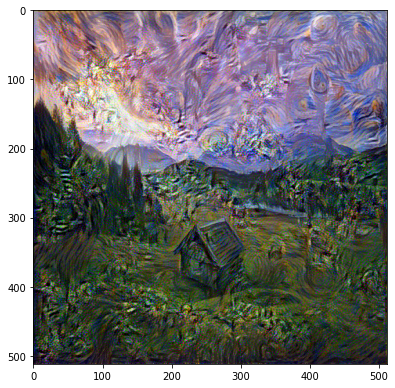

In [9]:
# Display Output
output_display = output.detach().cpu().numpy()
output_display = torch.Tensor(output_display)
output_display = output_display.squeeze(0)
plt.imshow(output_display.permute(1,2,0))